In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

#import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
address_url = "dataset/hi.csv"
address = pd.read_csv(address_url)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (2,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df = address[:1000]
df

,LON,LAT,NUMBER,STREET,UNIT,CITY,DISTRICT,REGION,POSTCODE,ID,HASH
0,-157.833127,21.300769,1625,CLARK ST HNL,NaN,HONOLULU,NaN,NaN,NaN,NaN,9b3cf2c890fa7e9d
1,-157.721942,21.289418,6152,KAWEKIU PL,NaN,NaN,NaN,NaN,NaN,NaN,6fa5d983b1a4dead
2,-157.722200,21.288880,6141,KAWEKIU PL,NaN,NaN,NaN,NaN,NaN,NaN,9ec61a48b879f0f3
3,-157.722751,21.290175,354,DALENE WAY,NaN,NaN,NaN,NaN,NaN,NaN,30b9cf496ad7d6e8
4,-157.724095,21.370414,1477,HUMUWILI PL,NaN,NaN,NaN,NaN,NaN,NaN,9da8e82c2d0508f6
5,-157.723510,21.369894,1486,HUMUWILI PL,NaN,NaN,NaN,NaN,NaN,NaN,3c07602f227355a1
6,-157.723346,21.370603,1469,HUMUULA ST,NaN,NaN,NaN,NaN,NaN,NaN,d0b56f55c1106112
7,-157.722639,21.369971,1499,HUMUULA ST,NaN,NaN,NaN,NaN,NaN,NaN,0dcae1322c0e5a85
8,-157.723396,21.369216,1428,ONIONI ST,NaN,NaN,NaN,NaN,NaN,NaN,62c880d4437ae984
9,-157.722406,21.369498,1460,ONIONI ST,NaN,NaN,NaN,NaN,NaN,NaN,cf2feebb7a6f6221


In [4]:
df = df.drop(['NUMBER','STREET', 'UNIT','CITY', 'DISTRICT', 'REGION', 'POSTCODE', 'ID', 'HASH'], axis=1)

In [5]:
print(df.isna().sum())

LON    0
LAT    0
dtype: int64


In [6]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from geopy.distance import great_circle
from shapely.geometry import MultiPoint


In [7]:
#db = DBSCAN(eps=2/6371., min_samples=5, algorithm='ball_tree', metric='haversine').fit(np.radians(coordinates))
df.head()

,LON,LAT
0,-157.833127,21.300769
1,-157.721942,21.289418
2,-157.722200,21.288880
3,-157.722751,21.290175
4,-157.724095,21.370414


In [8]:
df = df[['LAT', 'LON']]

In [9]:
coords = df.as_matrix(columns=['LAT', 'LON'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [10]:
coords

array([[  21.3007692, -157.8331271],
       [  21.2894181, -157.7219415],
       [  21.2888797, -157.7221999],
       ...,
       [  21.5561801, -157.8549372],
       [  21.332609 , -157.8509877],
       [  21.4135876, -157.9961337]])

In [11]:
kms_per_radian = 6371.0088
epsilon = 1.2 / kms_per_radian
model = DBSCAN(eps=epsilon, min_samples=1, algorithm='ball_tree', metric='haversine')
db = model.fit_predict(np.radians(coords))
cluster_labels = model.labels_
num_clusters = len(set(cluster_labels))
clusters = pd.Series([coords[cluster_labels == n] for n in range(num_clusters)])
print('Number of clusters: {}'.format(num_clusters))

Number of clusters: 87


In [12]:
df['Cluster'] = db
cluster_count = df.groupby('Cluster').count().sort_values(by=['LAT'],ascending=False)[:10]
cluster_count = cluster_count.drop(['LON'],axis=1)
x = cluster_count.LAT.keys()
cluster_count.LAT[40]

17

In [13]:
clusters

0     [[21.300769199999998, -157.83312709999998], [2...
1     [[21.3704139, -157.724095], [21.3698944, -157....
2     [[21.438741500000003, -158.1824914], [21.45042...
3     [[21.5918372, -158.10280569999998], [21.588346...
4     [[21.648575899999997, -157.923679], [21.647574...
5     [[21.4040826, -158.032432], [21.3887706, -157....
6     [[21.4811205, -157.8574958], [21.4824573, -157...
7     [[21.644256100000003, -158.0395134], [21.65221...
8     [[21.3336807, -158.06008319999998], [21.363263...
9     [[21.685752800000003, -158.02907549999998], [2...
10                         [[21.5216372, -158.0382947]]
11    [[21.3746914, -157.9008347], [21.3726491, -157...
12    [[21.410487, -157.7800342], [21.4240024, -157....
13    [[21.4599316, -158.0113928], [21.4542865, -158...
14    [[21.272467000000002, -157.70834480000002], [2...
15    [[21.4085918, -157.9982691], [21.4149431000000...
16    [[21.3332424, -157.91563359999998], [21.332230...
17    [[21.456418399999997, -157.8353039], [21.4

In [14]:

def get_centermost_point(cluster):
    centroid = (MultiPoint(cluster).centroid.x, MultiPoint(cluster).centroid.y)
    centermost_point = min(cluster, key=lambda point: great_circle(point, centroid).m)
    return tuple(centermost_point)


centermost_points = clusters.map(get_centermost_point)
#clusters
#get_centermost_point(clusters[10])
# cluster_centerpoints = [0][0]
# count = 0 
# for i in clusters[:len(clusters)-1]:
#     print(get_centermost_point(i))


In [15]:
lats, lons = zip(*centermost_points)
rep_points = pd.DataFrame({'lon':lons, 'lat':lats})

In [17]:
rep_points
#df = df.drop('Cluster',axis = 1)
#df

,lon,lat
0,-157.803608,21.296169
1,-157.743198,21.397872
2,-158.179884,21.440718
3,-158.109777,21.582179
4,-157.921468,21.648191
5,-157.964950,21.390632
6,-157.852518,21.482457
7,-158.046137,21.648409
8,-158.080155,21.344419
9,-158.030925,21.681926


In [21]:
rs = rep_points.apply(lambda row: df[(df['LAT']==row['lat']) & (df['LON']==row['lon'])].iloc[0], axis=1)
j = 0
rs['count'] = cluster_count.LAT
# for i in cluster_count.LAT:
#     print(i)
#     j+=1
rs.dropna(axis=0)


,LAT,LON,Cluster,count
0,21.296169,-157.803608,0.0,254.0
1,21.397872,-157.743198,1.0,52.0
5,21.390632,-157.964950,5.0,146.0
8,21.344419,-158.080155,8.0,73.0
12,21.411590,-157.801976,12.0,79.0
17,21.446893,-157.833001,17.0,20.0
21,21.318728,-158.013798,21.0,44.0
28,21.339753,-157.895822,28.0,33.0
40,21.471474,-158.214800,40.0,17.0
48,21.341729,-157.725097,48.0,18.0


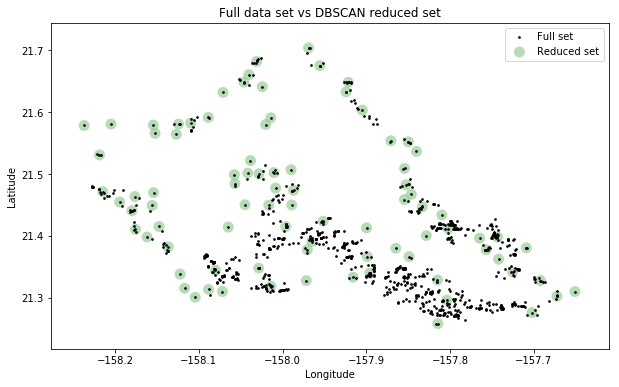

In [22]:

fig, ax = plt.subplots(figsize=[10, 6])
rs_scatter = ax.scatter(rs['LON'], rs['LAT'], c='#99cc99', edgecolor='None', alpha=0.7, s=120)
df_scatter = ax.scatter(df['LON'], df['LAT'], c='k', alpha=0.9, s=3)
ax.set_title('Full data set vs DBSCAN reduced set')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend([df_scatter, rs_scatter], ['Full set', 'Reduced set'], loc='upper right')
plt.show()

In [23]:
rs['count'] = cluster_count.LAT
# for i in cluster_count.LAT:
#     print(i)
#     j+=1
rs =rs.dropna(axis=0)
rs

,LAT,LON,Cluster,count
0,21.296169,-157.803608,0.0,254.0
1,21.397872,-157.743198,1.0,52.0
5,21.390632,-157.964950,5.0,146.0
8,21.344419,-158.080155,8.0,73.0
12,21.411590,-157.801976,12.0,79.0
17,21.446893,-157.833001,17.0,20.0
21,21.318728,-158.013798,21.0,44.0
28,21.339753,-157.895822,28.0,33.0
40,21.471474,-158.214800,40.0,17.0
48,21.341729,-157.725097,48.0,18.0


In [24]:
len(rs)

10

In [187]:
LongLatCount = [
    [[0,0],0],
    [[0,0],0],
    [[0,0],0],
    [[0,0],0],
    [[0,0],0],
    [[0,0],0],
    [[0,0],0],
    [[0,0],0],
    [[0,0],0],
    [[0,5],0]
]

In [205]:
index = 0
for i in range(len(rs)):
    print(rs['LAT'][cluster_count.LAT[i]])
    
for i in len(rs):
    
   # print(i)
    #print(rs['LAT'][0])
    #lon = round(rs['LON'][i])
    #lat = round(model.cluster_centers_[i][1],2)
    #count = int(cluster_count.LAT[i])
    #print(lon)
    #LongLatCount[index][0][0] = lon
    #LongLatCount[index][0][1] = lat
    #LongLatCount[index][1] = count
    #print(LongLatCount[index][0][0])
    index+=1
    #print(model.cluster_centers_[i][0],model.cluster_centers_[i][1],cluster_count.LAT[i])
#LongLatCount

KeyError: 254